In [1]:
import numpy as np
from numpy import linalg as l
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [104]:
a=5
N=1000

'''
right_part = np.geomspace(1, a + 1, 1000)
y = np.append(right_part - 1,- right_part + 1)
y = np.unique(y) #np.linspace(-a, a, 1001)
'''

uy = np.linspace(-np.sqrt(a), np.sqrt(a), N+1)
y = np.sign(uy) * uy**2

Y, Y_ = np.meshgrid(y, y, indexing='ij')

'''
step_y1 = y - np.roll(y, 1)
step_y2 = np.roll(y, -1) - y
step_y1[0] = step_y2[-1] = 0
step_y = (step_y1 + step_y2) / 2 #trapezoidal rule
'''

step_y1 = y - np.roll(y, 1)
step_y2 = np.roll(y, -1) - y
step_y1[0] = step_y2[-1] = 0
step_y = (step_y1 + step_y2) / 2 #trapezoidal rule

u = np.tanh(y)
dev2u = - 2 * np.tanh(y) / (np.cosh(y) ** 2)

min_Y = np.minimum(Y, Y_)
max_Y = np.maximum(Y, Y_)

In [108]:
psi_exact = 1 / np.cosh(y)
zeta_exact = -2 / (np.cosh(y) ** 3)

In [109]:
def count_eigen(k, a, max_Y, u, min_Y, dev2u, step_y):
    green = - (np.exp(- k * max_Y) - np.exp(- k * (2 * a - max_Y))) * \
              (np.exp(k * min_Y) - np.exp(- k * (2 * a + min_Y))) / \
              (1 - np.exp(- 4 * k * a)) / 2 / k
    
    kernel = np.diag(u) - (np.tile(dev2u, (len(dev2u), 1)).T * #np.tile() for manual 
                           green *                             #broadcasting
                           np.tile(step_y, (len(step_y), 1)))
    
    val, vect = l.eig(kernel)
    return val, vect

In [110]:
def plot_eigen(val, vect, k):
    fig, ax = plt.subplots(figsize=(11, 3))
    
    try: 
        k = k.round(5)
    except:
        k = k
    
    plt.subplot(1, 2, 1)
    plt.scatter(np.real(val), np.imag(val), s=8, alpha=0.7, label=f'k = {k}')
    plt.xlabel('Re(c)')
    plt.ylabel('Im(c)')
    plt.legend(fontsize=8)

    plt.subplot(1, 2, 2)
    # vect = vect.T
    idx_complexval1 = np.imag(val).argmax()
    # idx_complexval2 = np.imag(val).argmin()
    z = vect[:,idx_complexval1]
    re_z = np.real(z)
    plt.plot(y, -2*re_z/np.max(re_z), label=f'Re(EigVec) \n with C={val[idx_complexval1].round(5)}')
    plt.plot(y, -2*np.imag(z)/np.max(re_z), label=f'Im(EigVec) \n with C={val[idx_complexval1].round(5)}')
    
    plt.plot(y, zeta_exact, label=f'exact', linestyle=':', color='k')
    
    plt.legend(fontsize=8)
    
    return plt.show()

In [111]:
def plot_difference(vals, vect, k):
    eps = 1e-15
    vect = vect.T
    idx_complexval = np.imag(vals).argmax()
    zeta_vect = vect[idx_complexval]
    psi_vect = zeta_vect * (u + eps - vals[idx_complexval]) / (dev2u + eps)
    
    fig, ax = plt.subplots(figsize=(11, 3))

    plt.subplot(1, 2, 1)
    plt.plot(y, np.real(zeta_vect), label=f'EigVec with C={vals[idx_complexval].round(2)}')
    plt.plot(y, zeta_exact, label='exact solution')
    plt.xlabel('y')
    plt.ylabel('zeta(y)')
    plt.ylim(-2.1, 1.1)
    plt.legend(loc='upper right', fontsize=8)

    plt.subplot(1, 2, 2)
    vect = vect.T
    idx_complexval = np.imag(vals).argmax()
    plt.plot(y, np.real(psi_vect), label=f'psi with C={vals[idx_complexval].round(2)}')
    plt.plot(y, psi_exact, label='exact solution')
    plt.xlabel('y')
    plt.ylabel('psi(y)')
    plt.legend(loc='upper right', fontsize=8)

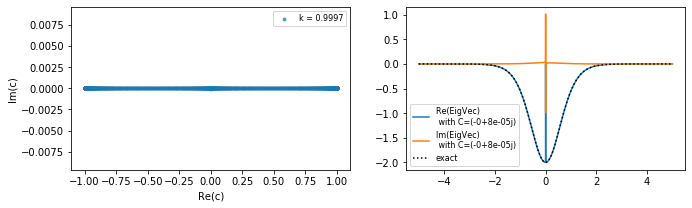

In [112]:
k = 0.9997
vals, vect = count_eigen(k, a, max_Y, u, min_Y, dev2u, step_y)
plot_eigen(vals, vect, k)